In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')  # Update the file path if necessary

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics and check for missing values
print(df.describe())
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [2]:
# Check for any null values
print(df.isnull().sum())

# Since the dataset might use a placeholder (like '0') for missing values especially in columns like Glucose, BloodPressure, we need to handle them.
import numpy as np

# Replace zeros with NaN in specific columns where zero is not feasible
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns] = df[columns].replace(0, np.nan)

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Check the new statistics
print(df.describe())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

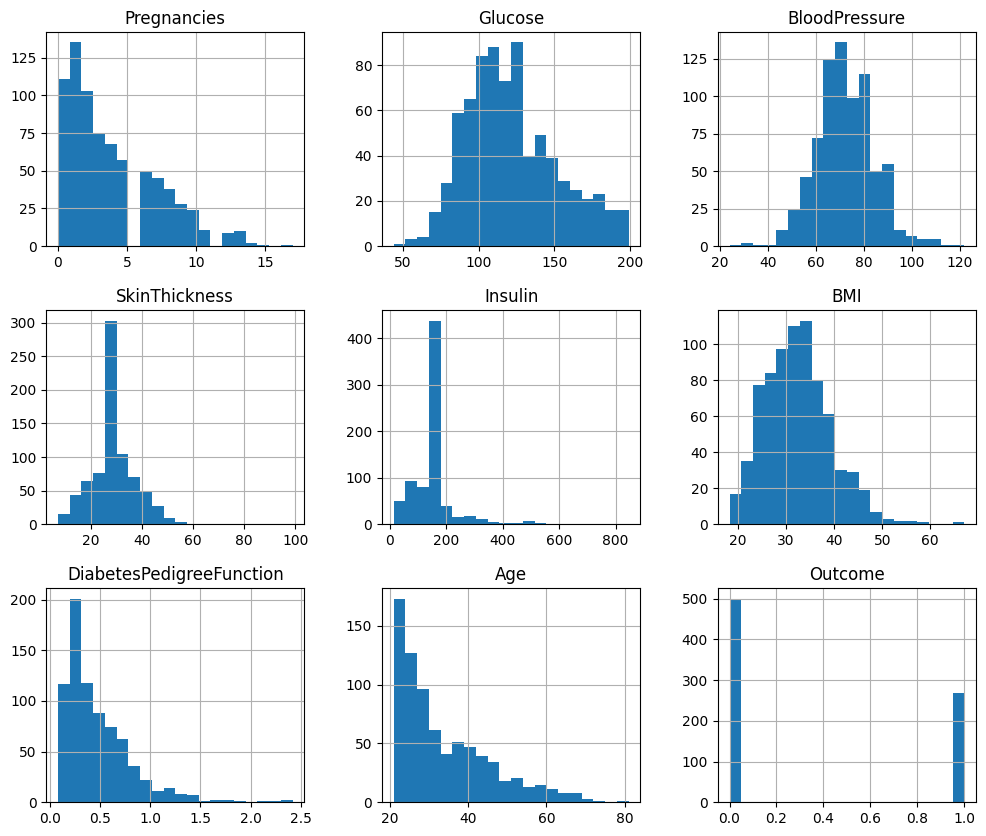

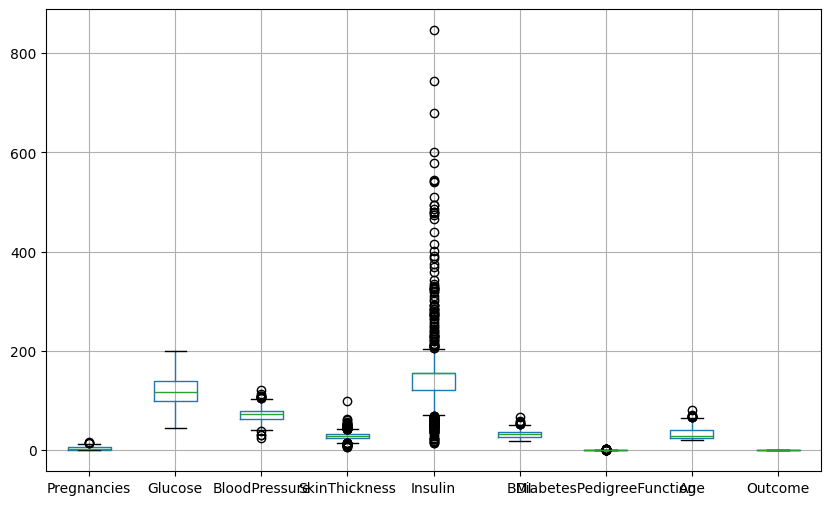

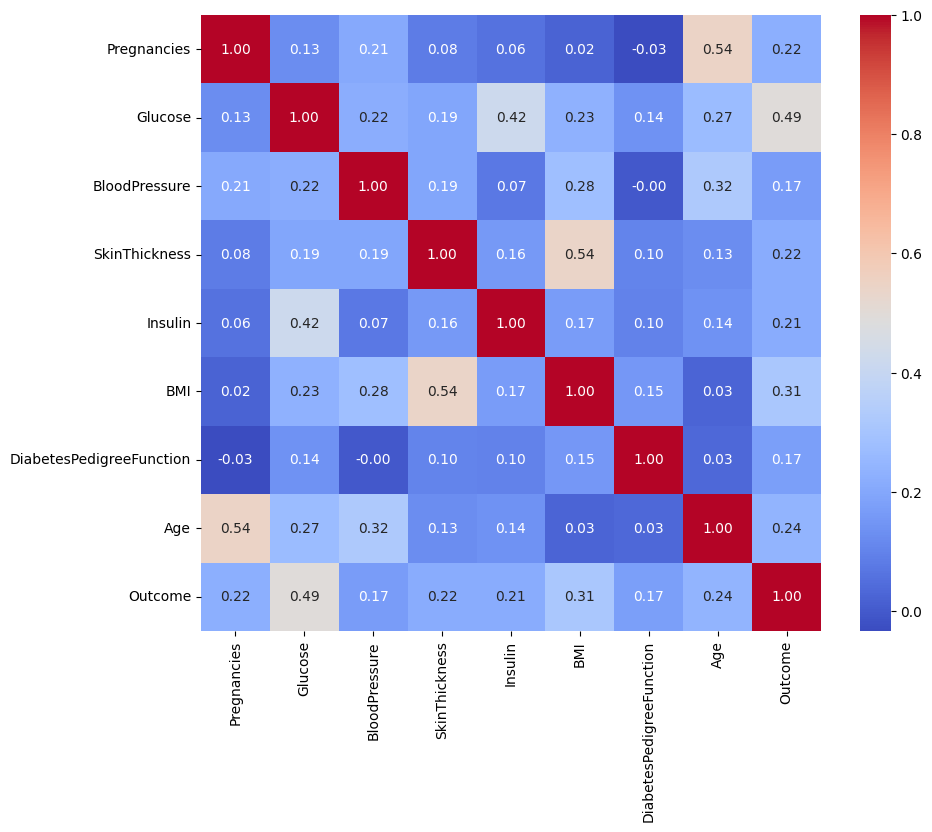

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of each feature
df.hist(bins=20, figsize=(12, 10))
plt.show()

# Box plot to check for outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Features and Labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data - 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
lr = LogisticRegression(solver='liblinear')  # 'liblinear' is a good choice for small datasets

# Train the model
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.59      0.63        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231

[[129  22]
 [ 33  47]]


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [7]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc = SVC(kernel='linear')  # Linear kernel

# Train the model
svc.fit(X_train, y_train)

# Predict on the testing set
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svc))


Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Predict on the testing set
y_pred_gbc = gbc.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gbc))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.74      0.75       231



In [9]:
print("Evaluation Metrics Comparison:")
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svc))
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gbc))


Evaluation Metrics Comparison:
Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73   